# Framing the problem

we have population divided into to main classes one loves troll2 movie and the other don't 

based on some features like amount of popcorn,soda,candy consumed during watching the movie we want to predict if new 

person love the movies or don't

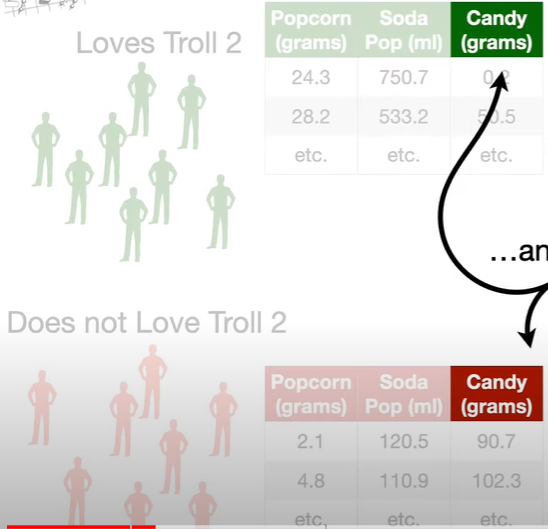

# Steps

1-as our features have continous values we will assume the are normal distribution

2-in trainning process we only need to learn the parameters of the assumed distribution like mean and varaince

and calculate prior probability(the belief).

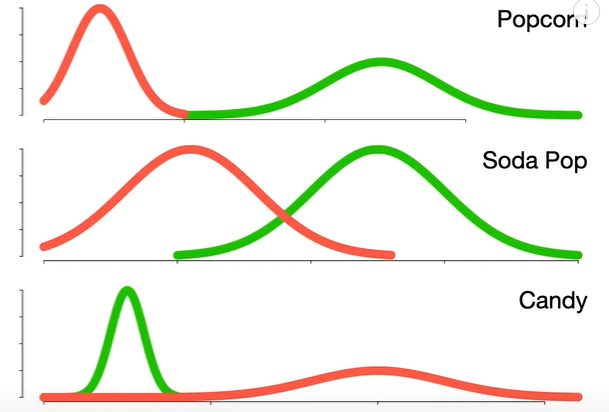

3-now when someone new shows up and we want to classifiy him based on calcualtion in trainnig data

the magic of Bayes theroem shows up here :

p(posterior)[someone loves toll2 given amount of candy,soda,popcorn eated]= likelyhood[given certain feature values of someone 

to which distribution does these values fits well more(love toll2 distributon or not] * p(prior)

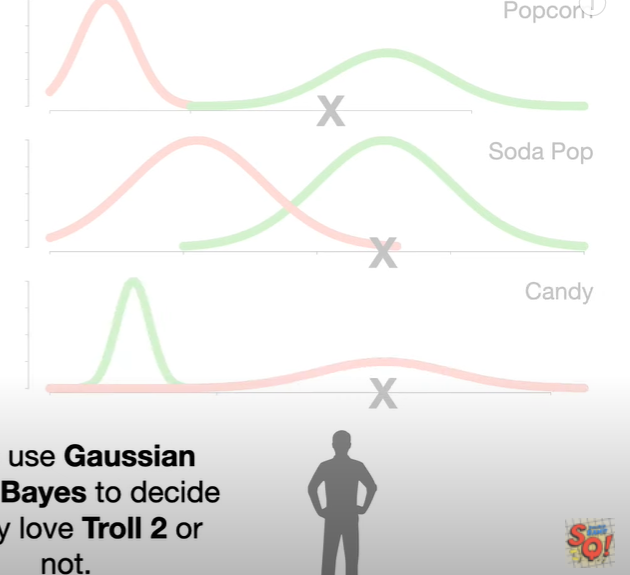

so why we use log instead of multipying likelyhood of each feature and prior probability??

to avoid the problem of underflow as it may happen that likelyhood value of certain feature is so small that multplying it to

the rest of terms may lead to small value cannot be presesnted by computer so the log convert multiplying into addition which 

solves the problem

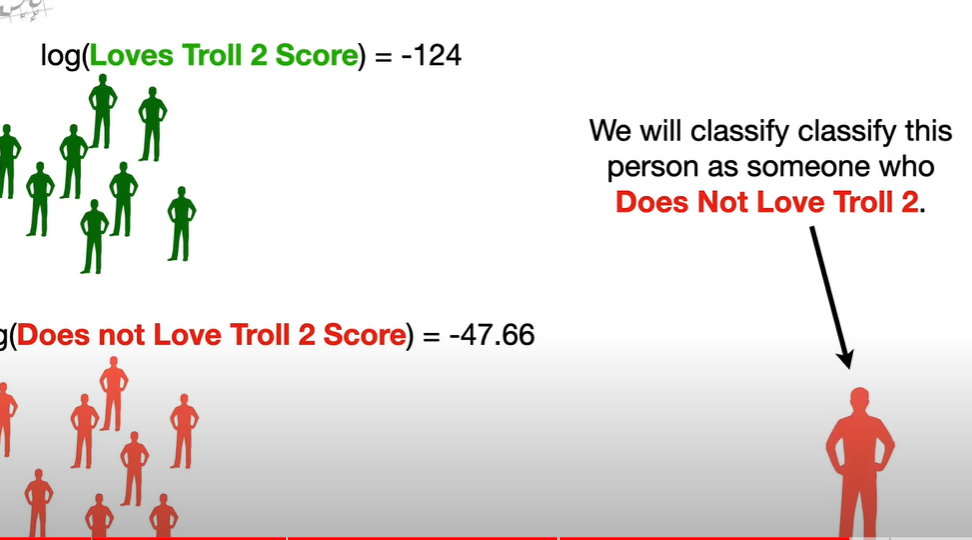

lastely classify the instance to the class with largest value and repeat for all the instances.

In [75]:
class NaiveBayes:
    def __init__(self,X,y):
        self.X=X
        self.y=y
        
    def fit(self):
        #fit function here is only to learn parameters from trainning data
        #we assume the the distribution of our continous features is normal
        #so now we need to calculate the distribution parameters for each class
        #in our trainnig data (mean, variance)
        
        self.no_of_samples,self.no_of_features=X.shape
        self.no_of_classes=len(np.unique(y))
        
        self.mean=np.zeros((self.no_of_classes,self.no_of_features))
        self.var=np.zeros((self.no_of_classes,self.no_of_features))
        self.prior=np.zeros((self.no_of_classes,1))
        
        
        for c in range(self.no_of_classes):
            X_per_class=X[y==c]
            self.mean[c,:]=np.mean(X_per_class,axis=0)
            self.var[c,:]=np.var(X_per_class,axis=0)
            self.prior[c]=X_per_class.shape[0]/self.no_of_samples
            
            
    def calculate_likelyhood(self,x,mean,var):
        
        denominator=np.sqrt(2*(np.pi)*var)
        
        numerator=np.exp(-0.5*((x-mean)**2/var))
        
        prob=numerator/denominator
        
        return prob
    
    
    def cal_class_prob(self,x):
        
        posterior_per_class=[]
        
        for c in range(self.no_of_classes):
            
            mean=self.mean[c]
            var=self.var[c]
            prior=np.log(self.prior[c])
            
            posterior=np.sum(np.log(self.calculate_likelyhood(x,mean,var)))
            posterior=posterior+prior
            
            posterior_per_class.append(posterior)
            
            
        return np.argmax(posterior_per_class)
    
    
    
    def predict(self,X):
        
        predictions=[self.cal_class_prob(x) for x in X]
        
        
        return np.array(predictions)
               

In [76]:
from sklearn.datasets import load_iris
import numpy as np
data = load_iris()


In [77]:
X=data.data
y=data.target

In [71]:
from sklearn.model_selection import train_test_split


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

nb = NaiveBayes(X_train,y_train)
nb.fit()
predictions = nb.predict(X_test)

# helper function to calculate accuracy
def get_accuracy(y_true, y_hat):
    return np.sum(y_true==y_hat) / len(y_true)
  

In [74]:
get_accuracy(y_test, predictions)

0.9666666666666667

# References

https://www.youtube.com/watch?v=H3EjCKtlVog&ab_channel=StatQuestwithJoshStarmer

https://towardsdatascience.com/implementing-naive-bayes-from-scratch-df5572e042ac